## Loading libraries

In [1]:
import bamboolib as bam 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix, mean_squared_error
from plotly.subplots import make_subplots
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


## Importing excel data

In [2]:
df=pd.read_csv("bike_crash.csv")
df.head()

  $1000 Damage to Any One Person's Property Active School Zone Flag  \
0                                        No                      No   
1                                        No                      No   
2                                        No                      No   
3                                        No                      No   
4                                        No                      No   

   At Intersection Flag Average Daily Traffic Amount Construction Zone Flag  \
0                 False                        15262                     No   
1                 False                      No Data                     No   
2                 False                      No Data                     No   
3                 False                      No Data                     No   
4                 False                        22775                     No   

              Crash Severity  Crash Time  Crash Total Injury Count  \
0      Incapacitating Injury

In [3]:
df

     $1000 Damage to Any One Person's Property Active School Zone Flag  \
0                                           No                      No   
1                                           No                      No   
2                                           No                      No   
3                                           No                      No   
4                                           No                      No   
...                                        ...                     ...   
2458                                        No                      No   
2459                                        No                      No   
2460                                        No                      No   
2461                                       Yes                      No   
2462                                       Yes                      No   

      At Intersection Flag Average Daily Traffic Amount  \
0                    False                        15

No missing values

## Data Cleanup

In [4]:
# Size of the dataset
df.shape

(2463, 16)

In [5]:
# data types
df.dtypes

$1000 Damage to Any One Person's Property    object
Active School Zone Flag                      object
At Intersection Flag                           bool
Average Daily Traffic Amount                 object
Construction Zone Flag                       object
Crash Severity                               object
Crash Time                                    int64
Crash Total Injury Count                      int64
Crash Year                                    int64
Day of Week                                  object
Intersection Related                         object
Roadway Part                                 object
Speed Limit                                   int64
Surface Condition                            object
Traffic Control Type                         object
Person Helmet                                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   $1000 Damage to Any One Person's Property  2463 non-null   object
 1   Active School Zone Flag                    2463 non-null   object
 2   At Intersection Flag                       2463 non-null   bool  
 3   Average Daily Traffic Amount               2463 non-null   object
 4   Construction Zone Flag                     2463 non-null   object
 5   Crash Severity                             2463 non-null   object
 6   Crash Time                                 2463 non-null   int64 
 7   Crash Total Injury Count                   2463 non-null   int64 
 8   Crash Year                                 2463 non-null   int64 
 9   Day of Week                                2463 non-null   object
 10  Intersection Related                

In [7]:
# columns of the dataset 
df.columns

Index(['$1000 Damage to Any One Person's Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Average Daily Traffic Amount',
       'Construction Zone Flag', 'Crash Severity', 'Crash Time',
       'Crash Total Injury Count', 'Crash Year', 'Day of Week',
       'Intersection Related', 'Roadway Part', 'Speed Limit',
       'Surface Condition', 'Traffic Control Type', 'Person Helmet'],
      dtype='object')

In [8]:
# Summary of the dataset
df.describe()

        Crash Time  Crash Total Injury Count   Crash Year  Speed Limit
count  2463.000000               2463.000000  2463.000000  2463.000000
mean   1404.700771                  1.092164  2013.403979    26.410881
std     558.967560                  1.208230     2.248480    17.005282
min       1.000000                  0.000000  2010.000000    -1.000000
25%    1008.000000                  1.000000  2011.000000     0.000000
50%    1532.000000                  1.000000  2013.000000    30.000000
75%    1822.500000                  1.000000  2015.000000    35.000000
max    2358.000000                 15.000000  2017.000000    65.000000

In [9]:
# checking for null data
df.isnull().sum()

$1000 Damage to Any One Person's Property    0
Active School Zone Flag                      0
At Intersection Flag                         0
Average Daily Traffic Amount                 0
Construction Zone Flag                       0
Crash Severity                               0
Crash Time                                   0
Crash Total Injury Count                     0
Crash Year                                   0
Day of Week                                  0
Intersection Related                         0
Roadway Part                                 0
Speed Limit                                  0
Surface Condition                            0
Traffic Control Type                         0
Person Helmet                                0
dtype: int64

No null values

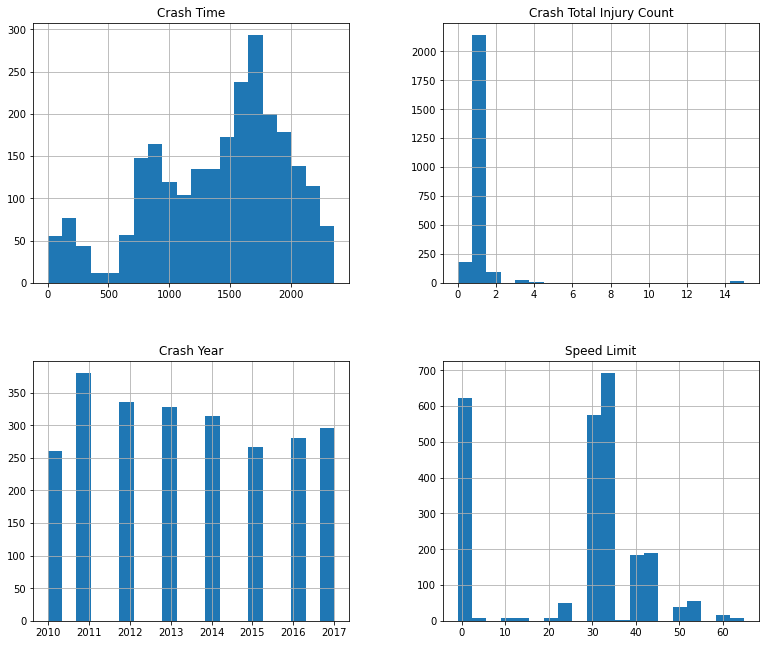

In [10]:
# Histogram of numerical values
df.hist(figsize=(13,11),bins=20)
plt.show()

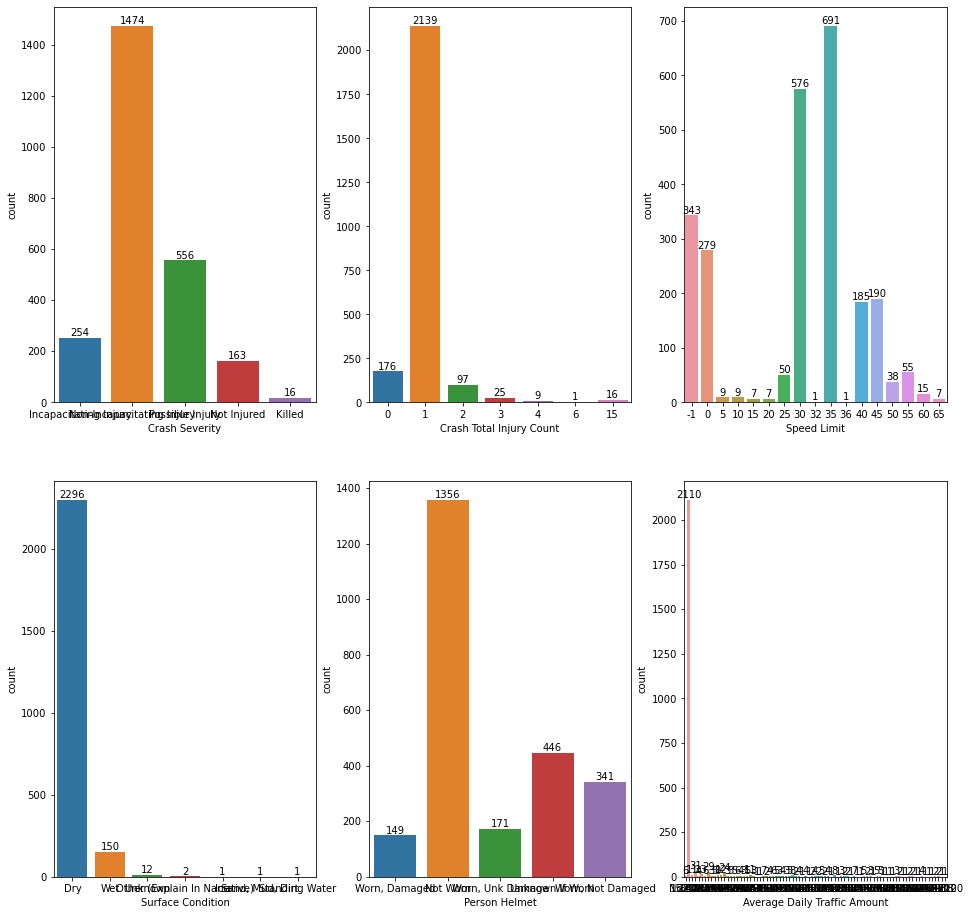

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# dataset exploration based on categorical values
fig, ax = plt.subplots(2,3, figsize=(16,16))
a=sns.countplot(data=df, x='Crash Severity' , ax=ax[0,0])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=df, x='Crash Total Injury Count' , ax=ax[0,1])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=df, x='Speed Limit' , ax=ax[0,2])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=df, x='Surface Condition' , ax=ax[1,0])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=df, x='Person Helmet' , ax=ax[1,1])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=df, x='Average Daily Traffic Amount' , ax=ax[1,2])
for container in a.containers:
    a.bar_label(container)

<AxesSubplot:>

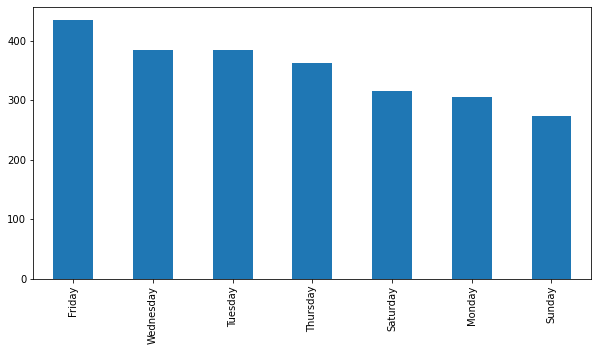

In [12]:
df['Day of Week'].value_counts().plot(kind='bar',figsize=(10,5))

##### There can be row duplicates but in this scenario we need to treat them as new bike crash cases.

Average Daily Traffic Amount and Speed limit misinformation values

Average Daily Traffic Amount has some values as "No Data" which comprises of "85.7% of data".
As most of the data is missing, I decided to remove this column

In [13]:
del df["Average Daily Traffic Amount"]
df.head()

  $1000 Damage to Any One Person's Property Active School Zone Flag  \
0                                        No                      No   
1                                        No                      No   
2                                        No                      No   
3                                        No                      No   
4                                        No                      No   

   At Intersection Flag Construction Zone Flag             Crash Severity  \
0                 False                     No      Incapacitating Injury   
1                 False                     No  Non-Incapacitating Injury   
2                 False                     No  Non-Incapacitating Injury   
3                 False                     No  Non-Incapacitating Injury   
4                 False                     No  Non-Incapacitating Injury   

   Crash Time  Crash Total Injury Count  Crash Year Day of Week  \
0         239                         1    

Speed Limit has value of ""-1" for "13.9%" of data and value of "0" for "11.3" of data. As the percentage of data with these values aee low, we can replace by the mean of the Speed Limit as it has a normal distribution when 0 and -1 values are taken out. 

In [14]:
# Speed Limit 
# filetring rows with Speed Limit > 0 
speedLimitFilter = df.loc[df['Speed Limit'] > 0]
# Calculating mean of the speed limit
speedLimitFilter["Speed Limit"].mean()

35.520369364475826

The mean value of speed limit without 0 and -1 values is 35.52. Checking the normal values of Speed Limit, I have decide to round down to 35 to fill the existing values of 0 and -1 with. 

In [15]:
df['Speed Limit'] = df['Speed Limit'].replace(0, 35)
df['Speed Limit'] = df['Speed Limit'].replace(-1, 35)

In [16]:
df

     $1000 Damage to Any One Person's Property Active School Zone Flag  \
0                                           No                      No   
1                                           No                      No   
2                                           No                      No   
3                                           No                      No   
4                                           No                      No   
...                                        ...                     ...   
2458                                        No                      No   
2459                                        No                      No   
2460                                        No                      No   
2461                                       Yes                      No   
2462                                       Yes                      No   

      At Intersection Flag Construction Zone Flag             Crash Severity  \
0                    False     

In [17]:
df.columns

Index(['$1000 Damage to Any One Person's Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Construction Zone Flag', 'Crash Severity',
       'Crash Time', 'Crash Total Injury Count', 'Crash Year', 'Day of Week',
       'Intersection Related', 'Roadway Part', 'Speed Limit',
       'Surface Condition', 'Traffic Control Type', 'Person Helmet'],
      dtype='object')

Adding severity column as a boolean value

In [18]:
df['Crash Severity'].unique()

array(['Incapacitating Injury', 'Non-Incapacitating Injury',
       'Possible Injury', 'Not Injured', 'Killed'], dtype=object)

['Incapacitating Injury', 'Possible Injury',  'Killed'] -> severity is 1
['Non-Incapacitating Injury','Not Injured'] -> severity is 0

In [19]:
def categorise(row):  
    if row['Crash Severity'] in 'Incapacitating Injury':
        return 1
    elif row['Crash Severity'] in 'Possible Injury':
        return 1
    elif row['Crash Severity'] in 'Killed':
        return 1
    return 0

df['severity'] = df.apply(lambda row: categorise(row), axis=1)
del df["Crash Severity"]
df.tail(10)

     $1000 Damage to Any One Person's Property Active School Zone Flag  \
2453                                       Yes                      No   
2454                                       Yes                      No   
2455                                        No                      No   
2456                                        No                      No   
2457                                        No                      No   
2458                                        No                      No   
2459                                        No                      No   
2460                                        No                      No   
2461                                       Yes                      No   
2462                                       Yes                      No   

      At Intersection Flag Construction Zone Flag  Crash Time  \
2453                  True                     No         748   
2454                  True                     No      

In [20]:
# Replacing "Surface Condition" Unknown values with mode of the colun "Dry"
df['Surface Condition'] = df['Surface Condition'].replace('Unknown', 'Dry')

## Cattegorical means of the dataset 

In [22]:
df.columns

Index(['$1000 Damage to Any One Person's Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Construction Zone Flag', 'Crash Time',
       'Crash Total Injury Count', 'Crash Year', 'Day of Week',
       'Intersection Related', 'Roadway Part', 'Speed Limit',
       'Surface Condition', 'Traffic Control Type', 'Person Helmet',
       'severity'],
      dtype='object')

In [23]:
# $1000 Damage to Any One Person\'s Property 
(df.groupby('$1000 Damage to Any One Person\'s Property').mean()).sort_values(by=['severity'], ascending=False)


                                           At Intersection Flag   Crash Time  \
$1000 Damage to Any One Person's Property                                      
Yes                                                    0.520604  1353.807692   
No                                                     0.527378  1426.055331   

                                           Crash Total Injury Count  \
$1000 Damage to Any One Person's Property                             
Yes                                                        1.413462   
No                                                         0.957349   

                                            Crash Year  Speed Limit  severity  
$1000 Damage to Any One Person's Property                                      
Yes                                        2013.559066    35.701923  0.383242  
No                                         2013.338905    35.257637  0.315274  

In [24]:
# Active School Zone Flag
df.groupby('Active School Zone Flag').mean().sort_values(by=['severity'], ascending=False)

                         At Intersection Flag   Crash Time  \
Active School Zone Flag                                      
No                                   0.526016  1405.252033   
Yes                                  0.000000   952.666667   

                         Crash Total Injury Count   Crash Year  Speed Limit  \
Active School Zone Flag                                                       
No                                       1.092276  2013.404878    35.395528   
Yes                                      1.000000  2012.666667    30.000000   

                         severity  
Active School Zone Flag            
No                       0.335366  
Yes                      0.333333  

In [25]:
# At Intersection Flag
(df.groupby('At Intersection Flag').mean()).sort_values(by=['severity'], ascending=False)

                       Crash Time  Crash Total Injury Count   Crash Year  \
At Intersection Flag                                                       
False                 1350.644996                  1.211292  2013.325064   
True                  1453.534776                  0.984544  2013.475270   

                      Speed Limit  severity  
At Intersection Flag                         
False                   35.680068  0.347305  
True                    35.125966  0.324575  

In [26]:
# Construction Zone Flag
(df.groupby('Construction Zone Flag').mean()).sort_values(by=['severity'], ascending=False)

                        At Intersection Flag   Crash Time  \
Construction Zone Flag                                      
No                                  0.525688  1404.641184   
Yes                                 0.500000  1409.533333   

                        Crash Total Injury Count   Crash Year  Speed Limit  \
Construction Zone Flag                                                       
No                                      1.094122  2013.413070    35.393753   
Yes                                     0.933333  2012.666667    35.000000   

                        severity  
Construction Zone Flag            
No                      0.335799  
Yes                     0.300000  

In [27]:
# Crash Year
(df.groupby('Crash Year').mean()).sort_values(by=['severity'], ascending=False)

            At Intersection Flag   Crash Time  Crash Total Injury Count  \
Crash Year                                                                
2016                    0.565836  1417.099644                  0.989324   
2015                    0.541353  1436.654135                  0.958647   
2017                    0.513514  1445.959459                  1.020270   
2011                    0.526316  1429.581579                  1.571053   
2010                    0.459770  1339.977011                  1.019157   
2014                    0.561905  1388.758730                  1.009524   
2013                    0.509146  1399.448171                  1.030488   
2012                    0.520833  1374.898810                  1.000000   

            Speed Limit  severity  
Crash Year                         
2016          35.249110  0.398577  
2015          34.687970  0.360902  
2017          35.219595  0.351351  
2011          35.065789  0.350000  
2010          36.417625  0.325670

In [28]:
# Day of Week
(df.groupby('Day of Week').mean()).sort_values(by=['severity'], ascending=False)


             At Intersection Flag   Crash Time  Crash Total Injury Count  \
Day of Week                                                                
Wednesday                0.475325  1462.090909                  1.561039   
Monday                   0.527869  1416.114754                  1.003279   
Tuesday                  0.587013  1443.353247                  0.963636   
Saturday                 0.503165  1330.177215                  1.022152   
Thursday                 0.550964  1448.176309                  0.997245   
Friday                   0.528736  1430.593103                  0.993103   
Sunday                   0.492701  1244.288321                  1.076642   

              Crash Year  Speed Limit  severity  
Day of Week                                      
Wednesday    2013.407792    34.974026  0.389610  
Monday       2013.462295    34.868852  0.363934  
Tuesday      2013.558442    35.961039  0.355844  
Saturday     2013.278481    35.212025  0.335443  
Thursday     20

In [29]:
# Intersection Related
(df.groupby('Intersection Related').mean()).sort_values(by=['severity'], ascending=False)


                      At Intersection Flag   Crash Time  \
Intersection Related                                      
Non Intersection                  0.043200  1327.931200   
Intersection Related              0.699491  1419.213922   
Intersection                      0.963176  1439.497123   
Driveway Access                   0.047493  1428.601583   
Not Reported                      0.000000  1541.000000   

                      Crash Total Injury Count   Crash Year  Speed Limit  \
Intersection Related                                                       
Non Intersection                      1.392000  2013.523200    35.432000   
Intersection Related                  1.001698  2013.504244    35.419355   
Intersection                          0.989643  2013.192175    34.903337   
Driveway Access                       0.976253  2013.546174    36.358839   
Not Reported                          0.000000  2010.000000    45.000000   

                      severity  
Intersection Related

In [30]:
# Roadway Part
(df.groupby('Roadway Part').mean()).sort_values(by=['severity'], ascending=False)


                              At Intersection Flag   Crash Time  \
Roadway Part                                                      
Service/Frontage Road                     0.459119  1424.012579   
Main/Proper Lane                          0.560634  1403.595616   
Other (Explain In Narrative)              0.111111  1399.313725   
Entrance/On Ramp                          0.285714  1422.285714   

                              Crash Total Injury Count   Crash Year  \
Roadway Part                                                          
Service/Frontage Road                         0.962264  2013.345912   
Main/Proper Lane                              1.111940  2013.436101   
Other (Explain In Narrative)                  0.954248  2013.039216   
Entrance/On Ramp                              1.000000  2012.857143   

                              Speed Limit  severity  
Roadway Part                                         
Service/Frontage Road           41.823899  0.408805  
Main/Pro

In [31]:
# Speed Limit
(df.groupby('Speed Limit').mean()).sort_values(by=['severity'], ascending=False)


             At Intersection Flag   Crash Time  Crash Total Injury Count  \
Speed Limit                                                                
10                       0.333333  1259.000000                  0.888889   
55                       0.490909  1309.581818                  1.000000   
60                       0.333333  1247.800000                  1.000000   
45                       0.447368  1368.015789                  0.963158   
40                       0.437838  1428.362162                  0.929730   
50                       0.368421  1501.289474                  0.894737   
35                       0.537700  1414.086824                  1.007616   
5                        0.222222  1546.111111                  0.777778   
25                       0.500000  1598.800000                  0.860000   
30                       0.583333  1379.123264                  1.440972   
65                       0.714286  1331.142857                  1.000000   
15          

In [32]:
# Surface Condition
(df.groupby('Surface Condition').mean()).sort_values(by=['severity'], ascending=False)


                              At Intersection Flag   Crash Time  \
Surface Condition                                                 
Other (Explain In Narrative)              0.000000   625.000000   
Wet                                       0.480000  1314.846667   
Dry                                       0.529029  1410.517764   
Ice                                       0.000000  1936.000000   
Sand, Mud, Dirt                           0.000000  1936.000000   
Standing Water                            1.000000  1954.000000   

                              Crash Total Injury Count   Crash Year  \
Surface Condition                                                     
Other (Explain In Narrative)                    1.0000  2013.000000   
Wet                                             2.5600  2013.393333   
Dry                                             0.9974  2013.405113   
Ice                                             1.0000  2011.000000   
Sand, Mud, Dirt                      

In [33]:
# Traffic Control Type
(df.groupby('Traffic Control Type').mean()).sort_values(by=['severity'], ascending=False)


                                            At Intersection Flag   Crash Time  \
Traffic Control Type                                                            
Flagman                                                 1.000000   854.000000   
Officer                                                 0.666667   795.000000   
Signal Light With Red Light Running Camera              0.769231  1314.576923   
Yield Sign                                              0.655172  1331.172414   
None                                                    0.168614  1413.131886   
Other (Explain In Narrative)                            0.290323  1363.225806   
Flashing Red Light                                      0.750000  1151.750000   
No Passing Zone                                         0.333333  1869.666667   
Warning Sign                                            0.333333  1135.000000   
Signal Light                                            0.847756  1407.400641   
Marked Lanes                

In [34]:
# Person Helmet
(df.groupby('Person Helmet').mean()).sort_values(by=['severity'], ascending=False)


                   At Intersection Flag   Crash Time  \
Person Helmet                                          
Worn, Unk Damage               0.526316  1429.362573   
Worn, Not Damaged              0.601173  1379.222874   
Unknown If Worn                0.511211  1439.914798   
Worn, Damaged                  0.583893  1344.355705   
Not Worn                       0.504425  1403.046460   

                   Crash Total Injury Count   Crash Year  Speed Limit  \
Person Helmet                                                           
Worn, Unk Damage                   0.988304  2013.888889    35.877193   
Worn, Not Damaged                  0.950147  2013.633431    35.897361   
Unknown If Worn                    1.466368  2013.513453    35.168161   
Worn, Damaged                      1.046980  2013.516779    35.704698   
Not Worn                           1.022861  2013.236726    35.237463   

                   severity  
Person Helmet                
Worn, Unk Damage   0.385965  
Worn,

# Outlier

In [35]:
df.columns

Index(['$1000 Damage to Any One Person's Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Construction Zone Flag', 'Crash Time',
       'Crash Total Injury Count', 'Crash Year', 'Day of Week',
       'Intersection Related', 'Roadway Part', 'Speed Limit',
       'Surface Condition', 'Traffic Control Type', 'Person Helmet',
       'severity'],
      dtype='object')

In [36]:
df.dtypes

$1000 Damage to Any One Person's Property    object
Active School Zone Flag                      object
At Intersection Flag                           bool
Construction Zone Flag                       object
Crash Time                                    int64
Crash Total Injury Count                      int64
Crash Year                                    int64
Day of Week                                  object
Intersection Related                         object
Roadway Part                                 object
Speed Limit                                   int64
Surface Condition                            object
Traffic Control Type                         object
Person Helmet                                object
severity                                      int64
dtype: object

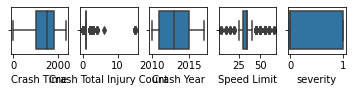

In [37]:
df_describe = df.drop(columns = ['$1000 Damage to Any One Person\'s Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Construction Zone Flag', 'Day of Week',
       'Intersection Related', 'Roadway Part','Surface Condition', 'Traffic Control Type', 'Person Helmet'])
x=1
  

for column in df_describe.columns:
    plt.subplot(4,5,x)
    sns.boxplot(df_describe[column])
    x+=1
plt.tight_layout
plt.show()

<AxesSubplot:>

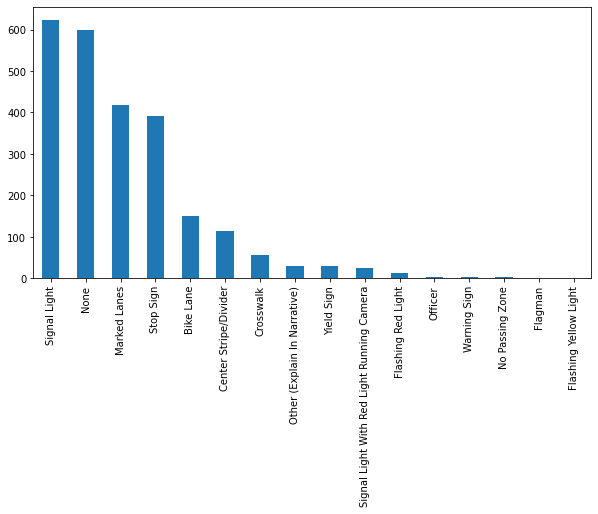

In [38]:
df['Traffic Control Type'].value_counts().plot(kind='bar',figsize=(10,5))

## Correlation Analysis

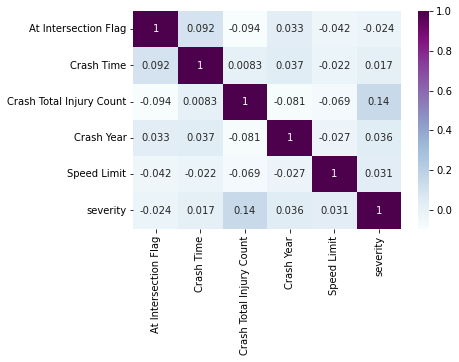

In [39]:
corr_df = df.corr()
sns.heatmap(df.corr(),cmap='BuPu',annot=True)
plt.show()

In [40]:
df.columns

Index(['$1000 Damage to Any One Person's Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Construction Zone Flag', 'Crash Time',
       'Crash Total Injury Count', 'Crash Year', 'Day of Week',
       'Intersection Related', 'Roadway Part', 'Speed Limit',
       'Surface Condition', 'Traffic Control Type', 'Person Helmet',
       'severity'],
      dtype='object')

In [41]:
df.head()

  $1000 Damage to Any One Person's Property Active School Zone Flag  \
0                                        No                      No   
1                                        No                      No   
2                                        No                      No   
3                                        No                      No   
4                                        No                      No   

   At Intersection Flag Construction Zone Flag  Crash Time  \
0                 False                     No         239   
1                 False                     No         310   
2                 False                     No         310   
3                 False                     No         310   
4                 False                     No        2300   

   Crash Total Injury Count  Crash Year Day of Week  Intersection Related  \
0                         1        2010      Friday      Non Intersection   
1                         2        2010      F

In [42]:
# Creating dummy variables for categorical analysis 
bikeCrash_wDummmy = df.copy()
bikeCrash_wDummmy=pd.get_dummies(bikeCrash_wDummmy,columns=['$1000 Damage to Any One Person\'s Property',
                                                  'Active School Zone Flag', 
                                                  'At Intersection Flag', 
                                                  'Construction Zone Flag', 
                                                  'Intersection Related',
                                                  'Roadway Part',
                                                  'Surface Condition'
                                                  ])
# Dropping Traffic Control Type and Day of Week as it has a lot of categorical variables
bikeCrash_wDummmy =bikeCrash_wDummmy.drop(['Traffic Control Type','Day of Week', 'Person Helmet'],axis=1)

bikeCrash_wDummmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   Crash Time                                      2463 non-null   int64
 1   Crash Total Injury Count                        2463 non-null   int64
 2   Crash Year                                      2463 non-null   int64
 3   Speed Limit                                     2463 non-null   int64
 4   severity                                        2463 non-null   int64
 5   $1000 Damage to Any One Person's Property_No    2463 non-null   uint8
 6   $1000 Damage to Any One Person's Property_Yes   2463 non-null   uint8
 7   Active School Zone Flag_No                      2463 non-null   uint8
 8   Active School Zone Flag_Yes                     2463 non-null   uint8
 9   At Intersection Flag_False                      2463 non-null  

In [43]:
bikeCrash_wDummmy.head()

   Crash Time  Crash Total Injury Count  Crash Year  Speed Limit  severity  \
0         239                         1        2010           45         1   
1         310                         2        2010           35         0   
2         310                         2        2010           35         0   
3         310                         2        2010           35         0   
4        2300                         1        2010           45         0   

   $1000 Damage to Any One Person's Property_No  \
0                                             1   
1                                             1   
2                                             1   
3                                             1   
4                                             1   

   $1000 Damage to Any One Person's Property_Yes  Active School Zone Flag_No  \
0                                              0                           1   
1                                              0                

## Multicolinearity 

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [45]:
calc_vif(df_describe)

                  variables        VIF
0                Crash Time   7.325432
1  Crash Total Injury Count   1.865175
2                Crash Year  38.436360
3               Speed Limit  30.026236
4                  severity   1.539147

## 1) Logistic Regression Model

Split dataset into training and testing data 

In [46]:
# 70/30 division of training and test dataset
X_train, X_test, y_train, y_test = train_test_split(bikeCrash_wDummmy.drop('severity',axis=1), 
                                                    bikeCrash_wDummmy['severity'], test_size=0.30, 
                                                    random_state=100)

In [47]:
logit_model1 = LogisticRegression(max_iter=3000)
logit_model1.fit(X_train,y_train)
y_pred = logit_model1.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logit_model1.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


In [48]:
logit_model_summary=sm.Logit(y_train,X_train)
result=logit_model_summary.fit()
print(result.summary2())

         Current function value: 0.612518
         Iterations: 35
                                                 Results: Logit
Model:                               Logit                           Pseudo R-squared:                0.037     
Dependent Variable:                  severity                        AIC:                             2153.9614 
Date:                                2023-01-29 23:46                BIC:                             2268.4619 
No. Observations:                    1724                            Log-Likelihood:                  -1056.0   
Df Model:                            20                              LL-Null:                         -1096.2   
Df Residuals:                        1703                            LLR p-value:                     3.3290e-09
Converged:                           0.0000                          Scale:                           1.0000    
No. Iterations:                      35.0000                                   

In [49]:
bikeCrash_wDummmy1 =bikeCrash_wDummmy.drop(['$1000 Damage to Any One Person\'s Property_No', 
                                                        'At Intersection Flag_True',
                                                        'Active School Zone Flag_Yes',
                                                        'Intersection Related_Not Reported',
                                                        'Intersection Related_Driveway Access',
                                                        'Roadway Part_Main/Proper Lane',
                                                        'Surface Condition_Dry',
                                                        'Construction Zone Flag_Yes'
                                                        ],axis=1)


In [50]:
calc_vif(bikeCrash_wDummmy1)

                                         variables         VIF
0                                       Crash Time    7.494397
1                         Crash Total Injury Count    2.154057
2                                       Crash Year  947.464569
3                                      Speed Limit   32.726298
4                                         severity    1.552146
5    $1000 Damage to Any One Person's Property_Yes    1.493531
6                       Active School Zone Flag_No  828.930813
7                       At Intersection Flag_False    5.988679
8                        Construction Zone Flag_No   82.322663
9                Intersection Related_Intersection    7.162943
10       Intersection Related_Intersection Related    3.932240
11           Intersection Related_Non Intersection    2.733674
12                   Roadway Part_Entrance/On Ramp    1.007936
13       Roadway Part_Other (Explain In Narrative)    1.172574
14              Roadway Part_Service/Frontage Road    1

In [51]:
bikeCrash_wDummmy1 =bikeCrash_wDummmy1.drop(['Crash Year', 
                                                        'Active School Zone Flag_No',
                                                        'Construction Zone Flag_No'
                                                        ],axis=1)


In [52]:
calc_vif(bikeCrash_wDummmy1)

                                         variables        VIF
0                                       Crash Time   6.423730
1                         Crash Total Injury Count   2.124480
2                                      Speed Limit  14.568336
3                                         severity   1.551479
4    $1000 Damage to Any One Person's Property_Yes   1.488949
5                       At Intersection Flag_False   4.731365
6                Intersection Related_Intersection   4.882367
7        Intersection Related_Intersection Related   2.892988
8            Intersection Related_Non Intersection   2.503655
9                    Roadway Part_Entrance/On Ramp   1.007556
10       Roadway Part_Other (Explain In Narrative)   1.146740
11              Roadway Part_Service/Frontage Road   1.132026
12                           Surface Condition_Ice   1.004561
13  Surface Condition_Other (Explain In Narrative)   1.008329
14               Surface Condition_Sand, Mud, Dirt   1.005004
15      

In [53]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(bikeCrash_wDummmy1.drop('severity',axis=1), 
                                                    bikeCrash_wDummmy1['severity'], test_size=0.30, 
                                                    random_state=100)

logit_model_summary1=sm.Logit(y_train1,X_train1)
result=logit_model_summary1.fit()
print(result.summary2())

         Current function value: 0.625595
         Iterations: 35
                                             Results: Logit
Model:                            Logit                         Pseudo R-squared:              0.016    
Dependent Variable:               severity                      AIC:                           2189.0514
Date:                             2023-01-29 23:47              BIC:                           2276.2898
No. Observations:                 1724                          Log-Likelihood:                -1078.5  
Df Model:                         15                            LL-Null:                       -1096.2  
Df Residuals:                     1708                          LLR p-value:                   0.0022051
Converged:                        0.0000                        Scale:                         1.0000   
No. Iterations:                   35.0000                                                               
----------------------------------

In [54]:
%%time
logit_model1_1 = LogisticRegression(max_iter=3000)
logit_model1_1.fit(X_train1,y_train1)
y_pred1 = logit_model1_1.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logit_model1_1.score(X_test1, y_test1)))

Accuracy of logistic regression classifier on test set: 0.66
CPU times: total: 125 ms
Wall time: 52.8 ms


In [55]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.66      0.98      0.79       486
           1       0.54      0.05      0.09       253

    accuracy                           0.66       739
   macro avg       0.60      0.51      0.44       739
weighted avg       0.62      0.66      0.55       739



In [56]:
# Confusion matrix 
confusionMatrix = metrics.confusion_matrix(y_test1, y_pred1)
confusionMatrix

array([[475,  11],
       [240,  13]], dtype=int64)

<AxesSubplot:>

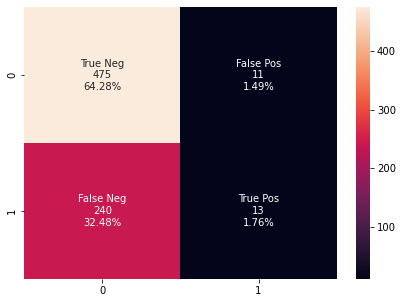

In [57]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusionMatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusionMatrix.flatten()/np.sum(confusionMatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusionMatrix, annot=labels, fmt='')

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))
print("Precision:",metrics.precision_score(y_test1, y_pred1))
print("Recall:",metrics.recall_score(y_test1, y_pred1))
print('MSE:',mean_squared_error(y_test1, y_pred1))

Accuracy: 0.6603518267929634
Precision: 0.5416666666666666
Recall: 0.05138339920948617
MSE: 0.33964817320703655


In [59]:
#modelResults
time1 = 103
accuracy1 = 66.03
precision1 = 54.17
recall1 = 5.14
mse1 = 33.96
aic1 = 2189.0514
falsepos1 = 1.49

### Model 2 - Forward Logistic Regression Model using Sequencial Forward Selection (SFS)

## Identifying ideal number of features

In [60]:
#Define Sequential Forward Selection (sfs)
sfs = SFS(LogisticRegression(),
           k_features=10,
           forward=True,
           floating=False,
           scoring = 'neg_mean_squared_error',
           cv = 5)
#Use SFS to select the top 5 features 
sfs.fit(X_train1, y_train1)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

                          feature_idx  \
1                                (1,)   
2                              (1, 4)   
3                           (1, 4, 5)   
4                        (1, 3, 4, 5)   
5                     (0, 1, 3, 4, 5)   
6                 (0, 1, 3, 4, 5, 12)   
7              (0, 1, 3, 4, 5, 6, 12)   
8          (0, 1, 3, 4, 5, 6, 10, 12)   
9      (0, 1, 3, 4, 5, 6, 10, 11, 12)   
10  (0, 1, 3, 4, 5, 6, 9, 10, 11, 12)   

                                            cv_scores avg_score  \
1   [-0.33043478260869563, -0.3391304347826087, -0... -0.328881   
2   [-0.33043478260869563, -0.3391304347826087, -0... -0.328881   
3   [-0.33043478260869563, -0.3391304347826087, -0... -0.328881   
4   [-0.33043478260869563, -0.3391304347826087, -0... -0.328301   
5   [-0.32753623188405795, -0.33043478260869563, -... -0.327722   
6   [-0.32753623188405795, -0.32463768115942027, -... -0.325982   
7   [-0.32463768115942027, -0.32753623188405795, -... -0.326562   
8   [-0.3246

In [61]:
#Define Sequential Forward Selection (sfs)
sfs = SFS(LogisticRegression(),
           k_features=10,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X_train1, y_train1)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

                          feature_idx               cv_scores avg_score  \
1                                (1,)  [-0.48214391310083204] -0.482144   
2                             (1, 15)  [-0.47952990267208273]  -0.47953   
3                          (1, 2, 15)  [-0.47952990267208273]  -0.47953   
4                       (0, 1, 2, 15)   [-0.4638458400995873] -0.463846   
5                    (0, 1, 2, 8, 15)   [-0.4638458400995873] -0.463846   
6                 (0, 1, 2, 3, 8, 15)    [-0.461231829670838] -0.461232   
7             (0, 1, 2, 3, 8, 14, 15)  [-0.45861781924208866] -0.458618   
8          (0, 1, 2, 3, 8, 9, 14, 15)   [-0.4560038088133396] -0.456004   
9      (0, 1, 2, 3, 8, 9, 13, 14, 15)   [-0.4560038088133396] -0.456004   
10  (0, 1, 2, 3, 7, 8, 9, 13, 14, 15)    [-0.461231829670838] -0.461232   

                                        feature_names  
1                         (Crash Total Injury Count,)  
2   (Crash Total Injury Count, Surface Condition_Wet)  
3   (C

('Crash Time', 'Crash Total Injury Count', 'Speed Limit', "$1000 Damage to Any One Person's Property_Yes", 'Roadway Part_Entrance/On Ramp', 'Surface Condition_Wet')

In [62]:
# Selecting top 6 features as the performance peaks at 5 features from above plot
forwardSelection = bikeCrash_wDummmy1[['Crash Time', 
                                        'Crash Total Injury Count', 
                                        'Speed Limit', 
                                        "$1000 Damage to Any One Person's Property_Yes", 
                                        'Roadway Part_Entrance/On Ramp', 
                                        'Surface Condition_Wet',
                                       'severity']]

In [63]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(forwardSelection.drop('severity',axis=1), 
                                                    forwardSelection['severity'], test_size=0.30, 
                                                    random_state=100)

logit_model_summary2=sm.Logit(y_train2,X_train2)
result=logit_model_summary2.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.630562
         Iterations 6
                                       Results: Logit
Model:                         Logit                     Pseudo R-squared:          0.008    
Dependent Variable:            severity                  AIC:                       2186.1764
Date:                          2023-01-29 23:47          BIC:                       2218.8908
No. Observations:              1724                      Log-Likelihood:            -1087.1  
Df Model:                      5                         LL-Null:                   -1096.2  
Df Residuals:                  1718                      LLR p-value:               0.0026981
Converged:                     1.0000                    Scale:                     1.0000   
No. Iterations:                6.0000                                                        
--------------------------------------------------------------------------------------------

In [64]:
%%time
logit_model1_2 = LogisticRegression(max_iter=3000)
logit_model1_2.fit(X_train2,y_train2)
y_pred2 = logit_model1_2.predict(X_test2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logit_model1_2.score(X_test2, y_test2)))

Accuracy of logistic regression classifier on test set: 0.67
CPU times: total: 31.2 ms
Wall time: 25.4 ms


In [65]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.98      0.79       486
           1       0.64      0.06      0.10       253

    accuracy                           0.67       739
   macro avg       0.65      0.52      0.45       739
weighted avg       0.66      0.67      0.56       739



In [66]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))
print("Precision:",metrics.precision_score(y_test2, y_pred2))
print("Recall:",metrics.recall_score(y_test2, y_pred2))
print('MSE:',mean_squared_error(y_test2, y_pred2))

Accuracy: 0.6657645466847091
Precision: 0.6363636363636364
Recall: 0.05533596837944664
MSE: 0.3342354533152909


In [67]:
# Confusion matrix 
confusionMatrix = metrics.confusion_matrix(y_test2, y_pred2)
confusionMatrix

array([[478,   8],
       [239,  14]], dtype=int64)

<AxesSubplot:>

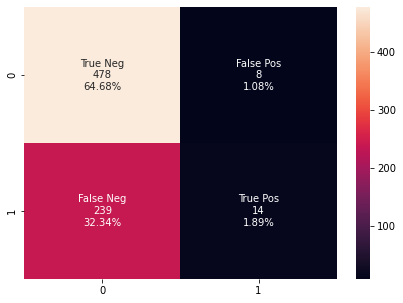

In [68]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusionMatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusionMatrix.flatten()/np.sum(confusionMatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusionMatrix, annot=labels, fmt='')

In [69]:
#modelResults
time2 = 42.5
accuracy2 = 66.58
precision2 = 63.64
recall2 = 5.53
mse2 = 33.42
aic2 = 2186.1764
falsepos2 = 1.08

## Model 3: Decision Tree


In [70]:
%%time
dt4 = DecisionTreeClassifier(max_depth=4)
dt4.fit(X_train1,y_train1)

CPU times: total: 0 ns
Wall time: 2.99 ms


DecisionTreeClassifier(max_depth=4)

In [71]:
y_pred4 = dt4.predict(X_test1)
confusionMatrix = confusion_matrix(y_test1, dt4.predict(X_test1))

<AxesSubplot:>

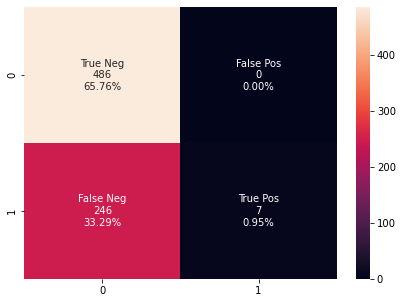

In [72]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusionMatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusionMatrix.flatten()/np.sum(confusionMatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusionMatrix, annot=labels, fmt='')

In [73]:
print('Accuracy: '+str(round(accuracy_score(y_test1, y_pred4)*100,2))+'%')
print('Precision: '+str(round(precision_score(y_test1, y_pred4)*100,2))+'%')
print('Recall: '+str(round(recall_score(y_test1, y_pred4)*100,2))+'%')
print('MSE: '+str(round(mean_squared_error(y_test1, y_pred4)*100,2))+'%')

Accuracy: 66.71%
Precision: 100.0%
Recall: 2.77%
MSE: 33.29%


In [74]:
#modelResults
time3 = 14.4
accuracy3 = 66.71
precision3 = 100
recall3 = 2.77
mse3 = 33.29
aic3 = 'NA'
falsepos3 = 0

In [75]:
# Feature importance
feature_names = (bikeCrash_wDummmy1.drop('severity',axis=1).columns)
feature_importance = pd.DataFrame(dt4.feature_importances_, index= feature_names)
feature_importance = feature_importance.reset_index()
feature_importance.columns = [str(column) for column in feature_importance.columns]
feature_importance

                                             index         0
0                                       Crash Time  0.154029
1                         Crash Total Injury Count  0.592315
2                                      Speed Limit  0.021289
3    $1000 Damage to Any One Person's Property_Yes  0.036385
4                       At Intersection Flag_False  0.000000
5                Intersection Related_Intersection  0.000000
6        Intersection Related_Intersection Related  0.000000
7            Intersection Related_Non Intersection  0.050691
8                    Roadway Part_Entrance/On Ramp  0.000000
9        Roadway Part_Other (Explain In Narrative)  0.000000
10              Roadway Part_Service/Frontage Road  0.145291
11                           Surface Condition_Ice  0.000000
12  Surface Condition_Other (Explain In Narrative)  0.000000
13               Surface Condition_Sand, Mud, Dirt  0.000000
14                Surface Condition_Standing Water  0.000000
15                      

In [76]:
features = (feature_importance.loc[feature_importance['0'] > 0]).sort_values(by=['0'])
features

                                            index         0
2                                     Speed Limit  0.021289
3   $1000 Damage to Any One Person's Property_Yes  0.036385
7           Intersection Related_Non Intersection  0.050691
10             Roadway Part_Service/Frontage Road  0.145291
0                                      Crash Time  0.154029
1                        Crash Total Injury Count  0.592315

In [77]:
print("Classification report - \n", classification_report(y_test1,y_pred4))

Classification report - 
               precision    recall  f1-score   support

           0       0.66      1.00      0.80       486
           1       1.00      0.03      0.05       253

    accuracy                           0.67       739
   macro avg       0.83      0.51      0.43       739
weighted avg       0.78      0.67      0.54       739



## Ramdom forest

In [78]:
# splitting the data for random forest
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(bikeCrash_wDummmy1.drop('severity',axis=1), 
                                                    bikeCrash_wDummmy1['severity'], test_size=0.30, 
                                                    random_state=101)

In [79]:
rf = RandomForestClassifier(n_estimators = 5000, criterion = 'entropy', random_state = 30, max_depth = 4)

In [80]:
%%time
rf = rf.fit(X_train_R, y_train_R)

CPU times: total: 6.23 s
Wall time: 7.69 s


In [81]:
rf_y = rf.predict(X_test_R)

In [82]:
print("Accuracy:",metrics.accuracy_score(y_test_R, rf_y))
print("Precision:",metrics.precision_score(y_test_R, rf_y))
print("Recall:",metrics.recall_score(y_test_R, rf_y))
print('MSE:',mean_squared_error(y_test_R, rf_y))
print(classification_report(y_test_R, rf_y))

Accuracy: 0.6684709066305818
Precision: 1.0
Recall: 0.02390438247011952
MSE: 0.33152909336941816
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       488
           1       1.00      0.02      0.05       251

    accuracy                           0.67       739
   macro avg       0.83      0.51      0.42       739
weighted avg       0.78      0.67      0.54       739



In [83]:
#modelResults
time4 = 7270
accuracy4 = 66.84
precision4 = 100
recall4 = 2.39
mse4 = 33.15
aic4 = 'NA'
falsepos4 = 0

Text(0.5, 0, 'Feature Importance Random Forest')

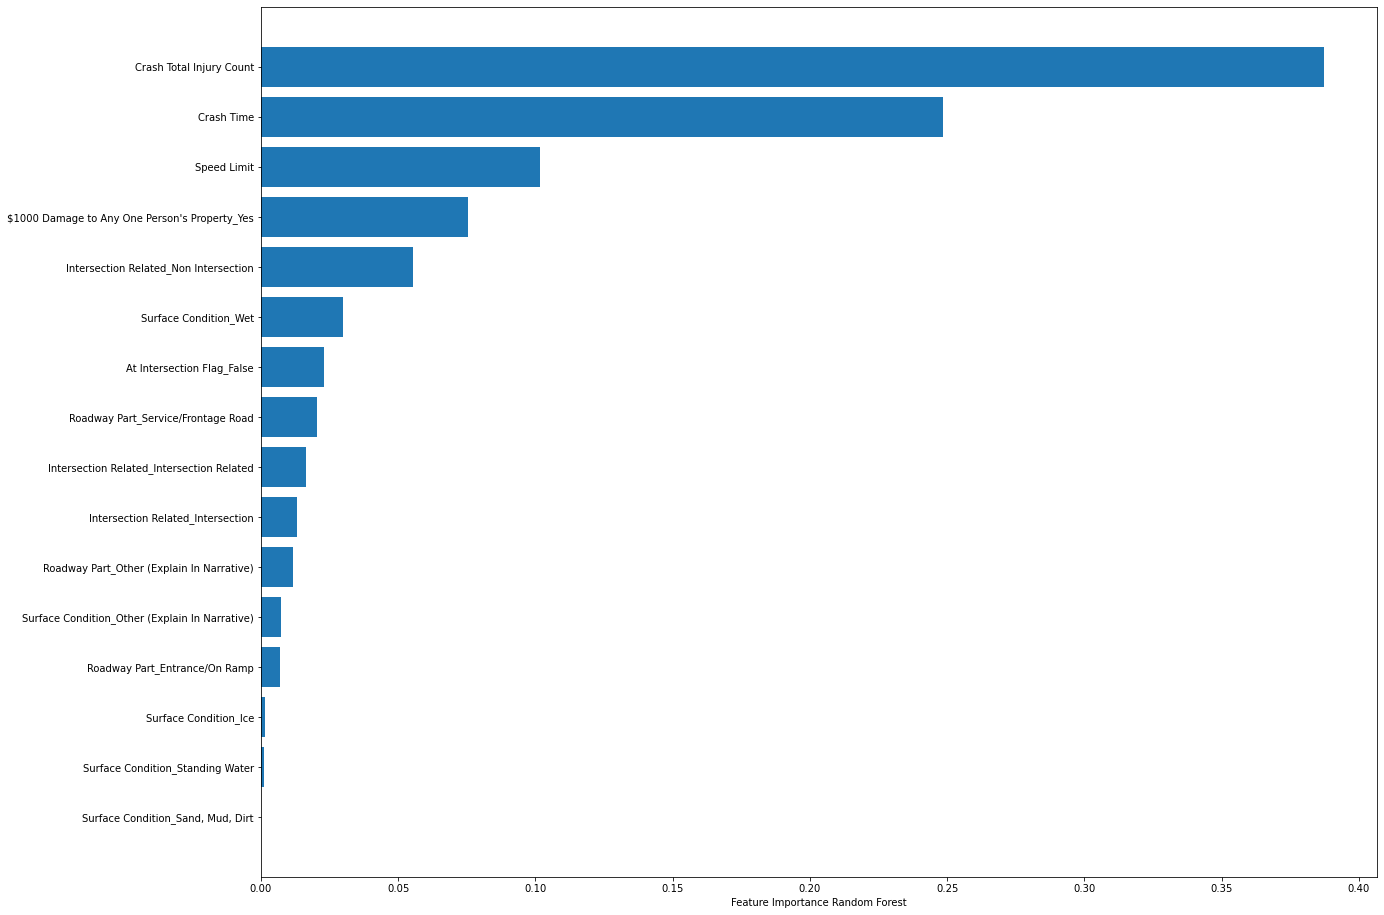

In [84]:
fig, ax = plt.subplots(figsize=(20,16))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train_R.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance Random Forest")

In [85]:
# Summarising all results 
modelResults = pd.DataFrame([['Logistic Regression', accuracy1,precision1,recall1, mse1, time1,aic1,falsepos1 ],
                       ['Logistic Regression with Forward Selection', accuracy2,precision2,recall2, mse2, time2,aic2, falsepos2],
                       ['Decision Tree', accuracy3,precision3,recall3, mse3, time3,aic3, falsepos3],
                       ['Random forest', accuracy4,precision4,recall4, mse4, time4,aic4, falsepos4],],
                       columns=['Model', 'Accuracy %', 'Precision %', 'Recall %', 'MSE','Time (ms)','AIC', 'False Positives %'])
modelResults


                                        Model  Accuracy %  Precision %  \
0                         Logistic Regression       66.03        54.17   
1  Logistic Regression with Forward Selection       66.58        63.64   
2                               Decision Tree       66.71       100.00   
3                               Random forest       66.84       100.00   

   Recall %    MSE  Time (ms)        AIC  False Positives %  
0      5.14  33.96      103.0  2189.0514               1.49  
1      5.53  33.42       42.5  2186.1764               1.08  
2      2.77  33.29       14.4         NA               0.00  
3      2.39  33.15     7270.0         NA               0.00  